In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/drug-classification/drug200.csv


In [3]:
def detect_data_types(df):
    """
    Detect whether the data type for each column in the DataFrame is discrete, continuous, or unknown.

    Parameters:
        df (pd.DataFrame): DataFrame containing the columns to analyze.

    Returns:
        dict: A dictionary where keys are column names and values are the data types ('discrete', 'continuous', 'unknown').
    """
    discrete_text_container=[]
    discrete_numeric_container=[]
    continuous_container=[]
    unknown_container=[]
    
    

    for column in df.columns:
        # Drop NaN values for analysis
        col_data = df[column].dropna()
        
        # Get unique value counts
        unique_values = col_data.nunique()

        # Check if the column is numerical (int or float)
        if col_data.dtype in ['int64', 'float64']:
            # For integer-based data with few unique values, it's likely discrete
            if col_data.dtype == 'int64' and unique_values / len(col_data) < 0.05:
                discrete_numeric_container.append(column)
            else:
                continuous_container.append(column)
                
        
        # Check if the column is categorical/text data
        elif col_data.dtype == 'object' or col_data.dtype.name == 'category':
            discrete_text_container.append(column)
        
        # If there are very few unique values compared to the length, treat it as discrete
        elif unique_values / len(col_data) < 0.05:
            discrete_text_container.append(column)
        
        # If the data doesn't fit into any category, mark it as 'unknown'
        else:
            unknown_container.append(column)
    
    return [discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
            



def dataset_analysis(df,target_column=None):


    # Total rows
    total_rows = len(df)
    # Count of unique rows
    unique_rows = len(df.drop_duplicates())
    # Count of duplicate rows
    duplicate_rows = total_rows - unique_rows
    # Calculate percentages
    unique_percentage = (unique_rows / total_rows) * 100
    duplicate_percentage = (duplicate_rows / total_rows) * 100

    print('='*50)
    print('Dataset Shape (Rows & Columns)')
    print('='*50)
    print('Rows :-',df.shape[0])
    print('Columns :-',df.shape[1])
    print(f"Unique Rows: {unique_rows} ({unique_percentage:.2f}%)")
    print(f"Duplicate Rows: {duplicate_rows} ({duplicate_percentage:.2f}%)")


    # Check for null (missing) values and their counts
    print("\n" + "="*50)
    print("Columns with Null Values and Null Value Counts")
    print("="*50)
    null_columns = df.columns[df.isnull().any()]
    if null_columns.empty:
        print("No columns contain null values.")
    else:
        for col in null_columns:
            null_count = df[col].isnull().sum()
            print(f"{col}: {null_count} null values")


    # Data type-wise column count
    print("\n" + "="*50)
    print("Data Type Wise Column Count")
    print("="*50)
    dtype_count = df.dtypes.value_counts()
    print(dtype_count)
    


    # Discrete And Continous Data Analysis
    print("\n" + "="*50)
    print("Discrete And Continous Data Analysis")
    print("="*50)
    dtype_count = df.columns
    dectectDataTypeObj=detect_data_types(df)

     # Extract containers
    discrete_text_columns, discrete_numeric_columns, continuous_columns, unknown_columns = dectectDataTypeObj

    #[discrete_text_container,discrete_numeric_container,continuous_container,unknown_container]
    
    if(len(dectectDataTypeObj)>0):

        #Discrete Text Columns
        if len(dectectDataTypeObj[0])>0:
            print('Discrete Text Columns :',', '.join(discrete_text_columns))
        else:
            print('Discrete Text Columns :','-----')

        print('\n')

        #Discrete Numeric Columns
        if len(dectectDataTypeObj[1])>0:
            print('Discrete Numeric Columns :',', '.join(discrete_numeric_columns) )
        else:
            print('Discrete Numeric Columns :','-----')
        print('\n')

        #Continuous  Columns
        if len(dectectDataTypeObj[2])>0:
            print('Continuous Columns :',', '.join(continuous_columns))
        else:
            print('Continuous Columns :','-----')

        print('\n')
        
        #Unknown Columns
        if len(dectectDataTypeObj[3])>0:
            print('Unknown Columns :',', '.join(unknown_columns))
        else:
            print('Unknown Columns :','-----')

        

    if len(continuous_columns) > 0:
        

        # Check skewness in numerical columns
        print("\n" + "="*50)
        print("Skewness of Numerical Columns")
        print("="*50)
        skewness = df[continuous_columns].skew()
        
        if skewness.empty:
            print("No numerical columns to check skewness.")
        else:
            for col in skewness.index:
                skew_value = skewness[col]
                
                # Determine the skewness range and flag
                if skew_value > 1:
                    skew_range = "Strong Positive Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value >= 0.5:
                    skew_range = "Mild Positive Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                elif skew_value >= -0.5 and skew_value <= 0.5:
                    skew_range = "Approximately Symmetric"
                    #flag = "No transformation needed"
                    flag=""
                elif skew_value <= -1:
                    skew_range = "Strong Negative Skew"
                    flag = "Consider transformation (e.g., log or square root)"
                elif skew_value <= -0.5:
                    skew_range = "Mild Negative Skew"
                    #flag = "Potential for mild skewness issues"
                    flag=""
                
                print(f"{col}: {skew_value:.2f} -> {skew_range}. {flag}")

        
        
        
            
    else:
        print("No numeric columns available for Skewness Analysis.")


    # Additional information aboutConstant unique values and example entries
    print("\n" + "="*50)
    print("Constant Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) == 1:
                print(f"{col}: {sorted(df[col].unique())}\n")
    

    # Additional information about unique values and example entries
    print("\n" + "="*50)
    print("Unique Values in Categorical Columns")
    print("="*50)
    categorical_cols=discrete_text_columns+discrete_numeric_columns
    if len(categorical_cols)>0:
        for col in categorical_cols:
            if len(df[col].unique()) != 1:
                print(f"{col}: {sorted(df[col].unique())}\n")
    
    

    # Check for Imbalance in Custom Target Column
    if target_column:
        print(f"\n{'='*50}\nImbalance Analysis for '{target_column}'\n{'='*50}")
        target_counts = df[target_column].value_counts()
        target_percentage = target_counts / len(df) * 100
    
    
        # Check for Imbalance
        imbalance_ratio = target_counts.min() / target_counts.max()
        print(f"The dataset is {'imbalanced' if imbalance_ratio < 0.25 else 'balanced'} with respect to '{target_column}'.")

     
    

In [2]:
df=pd.read_csv('/kaggle/input/drug-classification/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
dataset_analysis(df,target_column='Drug')


Dataset Shape (Rows & Columns)
Rows :- 200
Columns :- 6
Unique Rows: 200 (100.00%)
Duplicate Rows: 0 (0.00%)

Columns with Null Values and Null Value Counts
No columns contain null values.

Data Type Wise Column Count
object     4
int64      1
float64    1
Name: count, dtype: int64

Discrete And Continous Data Analysis
Discrete Text Columns : Sex, BP, Cholesterol, Drug


Discrete Numeric Columns : -----


Continuous Columns : Age, Na_to_K


Unknown Columns : -----

Skewness of Numerical Columns
Age: 0.03 -> Approximately Symmetric. 
Na_to_K: 1.04 -> Strong Positive Skew. Consider transformation (e.g., log or square root)

Constant Unique Values in Categorical Columns

Unique Values in Categorical Columns
Sex: ['F', 'M']

BP: ['HIGH', 'LOW', 'NORMAL']

Cholesterol: ['HIGH', 'NORMAL']

Drug: ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX']


Imbalance Analysis for 'Drug'
The dataset is imbalanced with respect to 'Drug'.


<h3>Data Preprocessing & EDA</h3>

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


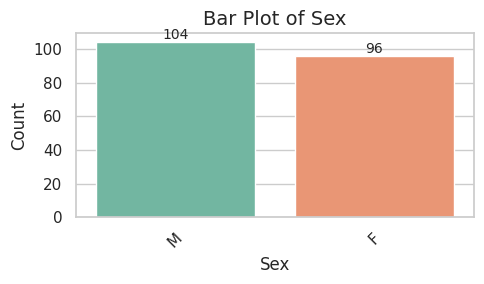

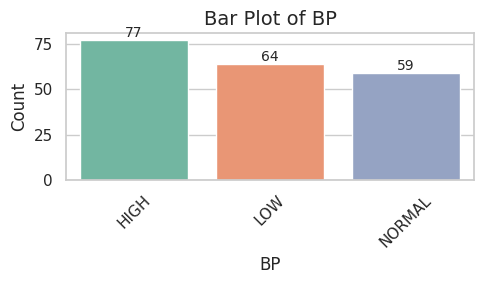

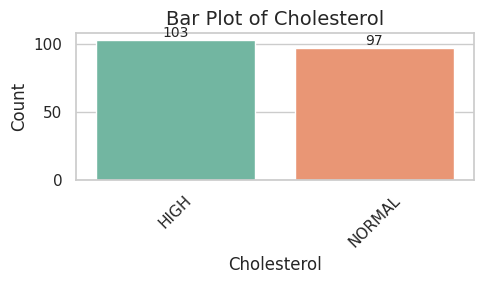

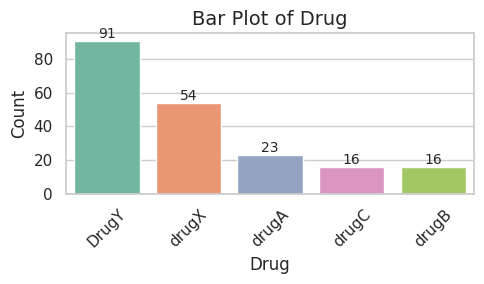

In [12]:
# Set modern style
sns.set(style="whitegrid", palette="Set2")

# Loop through object-type columns
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(5, 3))
    
    # Count plot
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Bar Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

    # Add value labels
    for p in ax.patches:
        value = int(p.get_height())
        ax.annotate(f'{value}', 
                    (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

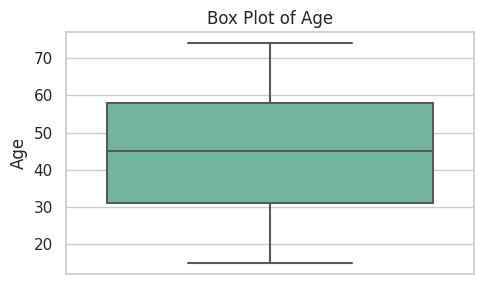

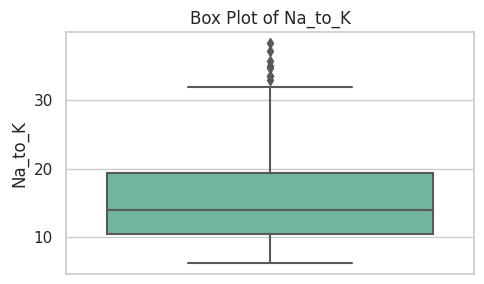

In [13]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

In [14]:
df[df['Na_to_K']>30].shape

(12, 6)

In [17]:
df=df[df['Na_to_K']<30]
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=encoder.fit_transform(df[col])

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [19]:
df['Age']=np.log1p(df['Age'])
df['Na_to_K']=np.log1p(df['Na_to_K'])
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,3.178054,0,0,0,3.271658,0
1,3.871201,1,1,0,2.645678,3
2,3.871201,1,1,0,2.408206,3
3,3.367296,0,2,0,2.174524,4
4,4.127134,0,1,0,2.946700,0


In [22]:
x = df.drop(columns=['Drug'])  # Features (all columns except 'price')
y = df['Drug'].values

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier  
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [25]:
def train_model(model, model_name):
    print(f'Model: {model_name}')
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predictions on the training data
    y_train_pred = model.predict(x_train)
    # Predictions on the testing data
    y_test_pred = model.predict(x_test)
    
    # Calculate accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f'Training Accuracy Score: {train_accuracy:.2f}')
    print(f'Testing Accuracy Score: {test_accuracy:.2f}')
    
    # Generate classification report for testing data
    report = classification_report(y_test, y_test_pred)
    print('Classification Report:')
    print(report)
    
    return model

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a dictionary for the models
model_list = dict(
    knn=KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2),
    svc=SVC(kernel='linear', random_state=0),
    logistic=LogisticRegression(),
    naive=GaussianNB(),
)

# Store evaluation results in a list
results = []

# Assuming X_train, y_train, X_test, y_test are already defined
for key, model in model_list.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    # Store the metrics in the results list
    results.append({
        'Model': key,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

model_metrics_df = pd.DataFrame(results)


sorted_df = model_metrics_df.sort_values(by='Accuracy', ascending=False)

styled_df = sorted_df.style.background_gradient(cmap='viridis', subset=['Accuracy'])

styled_df

,Model,Accuracy,Precision,Recall,F1-Score
1,svc,0.952381,0.975661,0.974126,0.974726
2,logistic,0.936508,0.947090,0.934126,0.937119
0,knn,0.777778,0.803721,0.798928,0.795358
3,naive,0.761905,0.719286,0.884615,0.732505


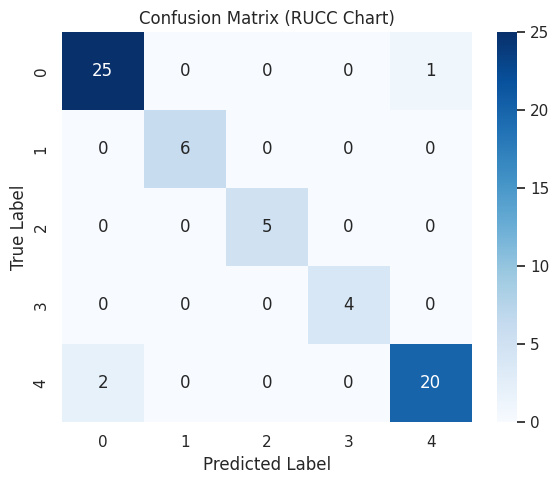

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# SVC with probability enabled
model = SVC(kernel='linear', random_state=0, probability=True)
model.fit(x_train, y_train)

# Predict classes
y_pred = model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_ if hasattr(model, 'classes_') else sorted(set(y_test))

# Using seaborn for a modern heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (RUCC Chart)')
plt.tight_layout()
plt.show()